# SRAG 2021 a 2024 - Banco de Dados de Síndrome Respiratória Aguda Grave - incluindo dados da COVID-19

Análise exploratória do banco de dados

Fonte: https://dados.gov.br/dados/conjuntos-dados/srag-2021-e-2022
Dicionário de dados: https://dados.gov.br/dados/conjuntos-dados/srag-2021-e-2022


## Processamento dos dados

Os dados são fornecidos em arquivos CSV com de até 1GB de dados. Esses dados devem ser
limpos e organizados para armazeamento em tabelas relacionais.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)
pd.set_option("display.width", 1000)
fields = ["NU_IDADE_N", "CS_SEXO", "CS_RACA", "VACINA_COV"]

df = pd.read_csv("raw_data/INFLUD21-01-05-2023.csv", sep=";", usecols=fields)

small_df = pd.read_csv("raw_data/INFLUD21-01-05-2023.csv", sep=";", nrows=10)

small_df

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,CO_UNI_NOT,CS_SEXO,DT_NASC,NU_IDADE_N,TP_IDADE,COD_IDADE,CS_GESTANT,CS_RACA,CS_ESCOL_N,ID_PAIS,CO_PAIS,SG_UF,ID_RG_RESI,CO_RG_RESI,ID_MN_RESI,CO_MUN_RES,CS_ZONA,SURTO_SG,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN,OUTRO_DES,PUERPERA,FATOR_RISC,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OBES_IMC,OUT_MORBI,MORB_DESC,VACINA,DT_UT_DOSE,MAE_VAC,DT_VAC_MAE,M_AMAMENTA,DT_DOSEUNI,DT_1_DOSE,DT_2_DOSE,ANTIVIRAL,TP_ANTIVIR,OUT_ANTIV,DT_ANTIVIR,HOSPITAL,DT_INTERNA,SG_UF_INTE,ID_RG_INTE,CO_RG_INTE,ID_MN_INTE,CO_MU_INTE,UTI,DT_ENTUTI,DT_SAIDUTI,SUPORT_VEN,RAIOX_RES,RAIOX_OUT,DT_RAIOX,AMOSTRA,DT_COLETA,TP_AMOSTRA,OUT_AMOST,PCR_RESUL,DT_PCR,POS_PCRFLU,TP_FLU_PCR,PCR_FLUASU,FLUASU_OUT,PCR_FLUBLI,FLUBLI_OUT,POS_PCROUT,PCR_VSR,PCR_PARA1,PCR_PARA2,PCR_PARA3,PCR_PARA4,PCR_ADENO,PCR_METAP,PCR_BOCA,PCR_RINO,PCR_OUTRO,DS_PCR_OUT,CLASSI_FIN,CLASSI_OUT,CRITERIO,EVOLUCAO,DT_EVOLUCA,DT_ENCERRA,DT_DIGITA,HISTO_VGM,PAIS_VGM,CO_PS_VGM,LO_PS_VGM,DT_VGM,DT_RT_VGM,PCR_SARS2,PAC_COCBO,PAC_DSCBO,OUT_ANIM,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,TOMO_RES,TOMO_OUT,DT_TOMO,TP_TES_AN,DT_RES_AN,RES_AN,POS_AN_FLU,TP_FLU_AN,POS_AN_OUT,AN_SARS2,AN_VSR,AN_PARA1,AN_PARA2,AN_PARA3,AN_ADENO,AN_OUTRO,DS_AN_OUT,TP_AM_SOR,SOR_OUT,DT_CO_SOR,TP_SOR,OUT_SOR,DT_RES,RES_IGG,RES_IGM,RES_IGA,ESTRANG,VACINA_COV,DOSE_1_COV,DOSE_2_COV,DOSE_REF,FAB_COV_1,FAB_COV_2,FAB_COVREF,LOTE_REF,LAB_PR_COV,LOTE_1_COV,LOTE_2_COV,FNT_IN_COV
0,06/01/2021,1,06/01/2021,1,BA,NUCLEO REGIONAL DE SAUDE NORDESTE,1382.0,ALAGOINHAS,290070,HOSPITAL REGIONAL DANTAS BIAO,2487438,M,07/09/1951,69,3,3069,6,1,9.0,BRASIL,1,BA,NUCLEO REGIONAL DE SAUDE NORDESTE,1382.0,ALAGOINHAS,290070,1.0,NaN,NaN,9.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,1,06/01/2021,BA,NUCLEO REGIONAL DE SAUDE NORDESTE,1382.0,ALAGOINHAS,290070,1,06/01/2021,NaN,9.0,NaN,NaN,NaN,1.0,06/01/2021,1.0,NaN,2.0,10/01/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,1.0,2.0,10/01/2021,11/01/2021,07/01/2021,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,9.0,NaN,NaN,1.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,08/01/2021,1,03/01/2021,1,BA,NUCLEO REGIONAL DE SAUDE SUL,1385.0,ITABUNA,291480,HOSPITAL CALIXTO MIDLEJ FILHO,2772280,M,19/07/1931,89,3,3089,6,9,NaN,BRASIL,1,BA,NUCLEO REGIONAL DE SAUDE SUL,1385.0,ITABUNA,291480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2021,BA,NUCLEO REGIONAL DE SAUDE SUL,1385.0,ITABUNA,291480,1,04/01/2021,05/01/2021,NaN,NaN,NaN,NaN,1.0,03/01/2021,1.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,2.0,05/01/2021,08/01/2021,08/01/2021,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,03/01/2021,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,09/01/2021,1,07/01/2021,1,PR,02RS METROPOLITANA,1356.0,CURITIBA,410690,COMPLEXO HOSPITALAR DO TRABALHADOR,15369,F,07/11/1969,51,3,3051,5,9,NaN,BRASIL,1,PR,02RS METROPOLITANA,1356.0,PIRAQUARA,411950,NaN,NaN,2.0,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"30,8",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1,10/01/2021,PR,02RS METROPOLITANA,1356.0,CURITIBA,410690,1,10/01/2021,16/01/2021,2.0,6.0,NaN,NaN,1.0,09/01/2021,1.0,NaN,2.0,12/01/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,1.0,1.0,18/01/2021,18/01/2021,11/01/2021,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

<Axes: xlabel='NU_IDADE_N', ylabel='Percent'>

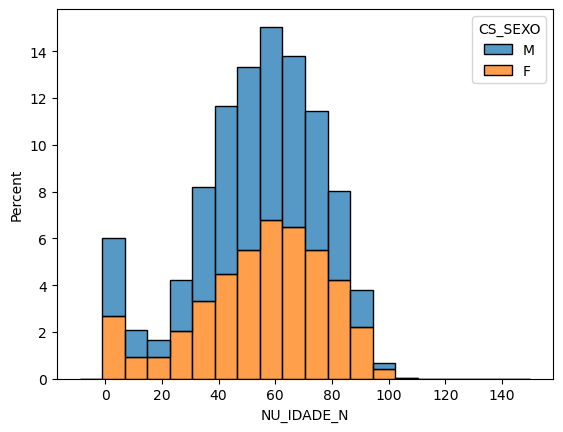

In [ ]:
## combinando plots em uma imagem
# fig, axs = plt.subplots(ncols=2)


## plot por idade (histograma)

df_clean = df[df.CS_SEXO != "I"]

# with sns.axes_style("whitegrid", {'axes.grid': False,'axes.axesbelow': False}):
sns.histplot(
    df_clean, x="NU_IDADE_N", hue="CS_SEXO", stat="percent", bins=20, multiple="stack"
)
# sns.displot(df_clean, x='NU_IDADE_N', row='CS_SEXO', col='CS_RACA', stat='percent', hue='CS_SEXO', bins = 20)

# sns.displot(df_clean[df.VACINA_COV == 1], x='NU_IDADE_N', row='CS_SEXO', col='CS_RACA', stat='percent', hue='CS_SEXO', bins = 20)
# sns.displot(df_clean[df.VACINA_COV != 1], x='NU_IDADE_N', row='CS_SEXO', col='CS_RACA', stat='percent', hue='CS_SEXO', bins = 20)

## Criando pirâmides etárias

<Figure size 640x480 with 0 Axes>

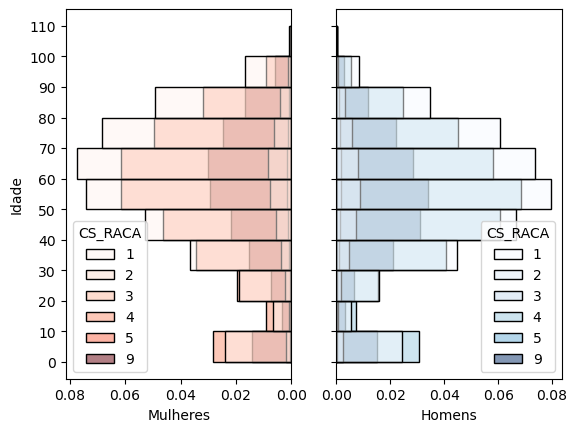

In [56]:
## hue test
x = np.array(list("ABCDEFGHIJ"))

# Create a figure and a set of subplots
plt.subplots_adjust(hspace=0, wspace=0)
fig, ax = plt.subplots(1, 2, sharey=True, squeeze=True)

yrange = (0, 110)
nticks = 11
ticks = [i * 10 for i in range(nticks + 1)]

sns.histplot(
    y="NU_IDADE_N",
    data=df_clean[df_clean.CS_SEXO == "F"],
    bins=nticks,
    binrange=yrange,
    ax=ax[0],
    hue="CS_RACA",
    stat="proportion",
    palette="Reds"
)

sns.histplot(
    y="NU_IDADE_N",
    data=df_clean[df_clean.CS_SEXO == "M"],
    bins=nticks,
    binrange=yrange,
    ax=ax[1],
    stat="proportion",
    hue="CS_RACA",
    palette="Blues"
)

ax[0].invert_xaxis()
ax[0].set_ylabel("Idade")
ax[0].set_xlabel("Mulheres")
ax[0].set_yticks(ticks)
ax[1].set_xlabel("Homens")
# ax[1].invert_xaxis()
# ax[1].set_xlabel("Value")
# ax[1].set_ylabel("Frequency")


# Show plot
plt.show()